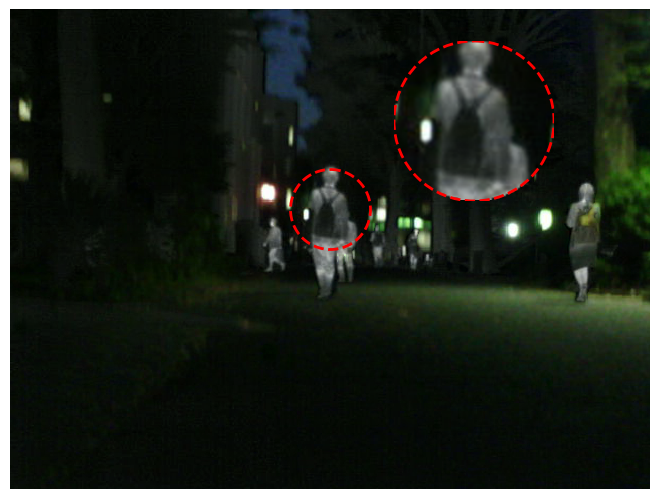

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
import numpy as np
import PIL.Image as Image


def plot_circle_zoom(img: np.ndarray, 
                     pos: tuple,
                     r: int, 
                     zoom: float,
                     circle_x: float,
                     circle_y: float,
                     line1: str=None,
                     line2: str=None):
    # 获取图像的实际尺寸
    img_height, img_width = img.shape[:2]

    # 设置 figure 的大小为图像的实际尺寸（以英寸为单位）
    dpi = 100  # 你可以根据需要调整这个值
    fig_width = img_width / dpi
    fig_height = img_height / dpi

    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
    # 调整 axes 的位置，使其完全填充 figure
    ax.set_position([0, 0, 1, 1])

    ax.imshow(img)
    ax.set_axis_off()

    out_resize = int(2*r*zoom)

    circle = Circle(pos, radius=r, edgecolor='red', facecolor='none', lw=2, linestyle='--')
    ax.add_patch(circle)
    img_cicle = img[pos[1]-r:pos[1]+r, pos[0]-r:pos[0]+r]

    Y, X = np.ogrid[:2*r, :2*r]
    center = r
    dist_from_center = np.sqrt((X - center)**2 + (Y - center)**2)
    mask = dist_from_center <= r

    # 提取圆内的图像并创建掩码
    img_circle = img[pos[1]-r:pos[1]+r, pos[0]-r:pos[0]+r]
    Y, X = np.ogrid[:2*r, :2*r]
    center = r
    dist_from_center = np.sqrt((X - center)**2 + (Y - center)**2)
    mask = dist_from_center <= r

    # 放大圆内的图像并应用透明背景
    img_circle_rgba = np.zeros((2*r, 2*r, 4), dtype=np.uint8)  # 创建一个空的 RGBA 图像
    img_circle_rgba[..., :3] = img_circle  # 复制 RGB 通道
    img_circle_rgba[..., 3] = mask * 255  # 应用掩码到 alpha 通道

    pil_zoomed = Image.fromarray(img_circle_rgba).resize((out_resize, out_resize), Image.Resampling.BICUBIC)
    circle_img = np.array(pil_zoomed)

    # 定义小图像的位置和大小
    x, y, width, height = circle_x, circle_y, out_resize / img_width, out_resize / img_height

    # 添加小图像轴
    ax_inset = fig.add_axes([x, y, width, height], zorder=3)
    ax_inset.imshow(circle_img, zorder=3)
    ax_inset.set_xlim(0, out_resize)
    ax_inset.set_ylim(out_resize, 0)
    ax_inset.axis('off')

    # 在小图像上绘制一个新的圆圈
    inset_circle = Circle((out_resize / 2, out_resize / 2), radius=out_resize / 2, edgecolor='red', 
                          facecolor='none', lw=2, linestyle='--', zorder=4)
    ax_inset.add_patch(inset_circle)

    # 获取 ax_inset 在原图上的位置
    inset_bbox = ax_inset.get_position()
    inset_pos_fig = [inset_bbox.x0, inset_bbox.y0, inset_bbox.x1, inset_bbox.y1]

    # 转换从图像坐标到数据坐标
    inset_pos_data = ax.transData.inverted().transform(fig.transFigure.transform([
        [inset_pos_fig[0], inset_pos_fig[1]],
        [inset_pos_fig[2], inset_pos_fig[3]]
    ]))

    inset_x0, inset_y0 = inset_pos_data[0]
    inset_x1, inset_y1 = inset_pos_data[1]

    bz_left = (pos[0]-r, pos[1])
    bz_right = (pos[0]+r, pos[1])
    bz_upper = (pos[0], pos[1]-r)
    bz_bottom = (pos[0], pos[1]+r)

    az_left = (inset_x0, inset_y1+out_resize/2)
    az_right = (inset_x1, inset_y1+out_resize/2)
    az_upper = (inset_x0+out_resize/2, inset_y1)
    az_bottom = (inset_x0+out_resize/2, inset_y0)
    
    before_d = {
        'l': bz_left,
        'r': bz_right,
        't': bz_upper,
        'b': bz_bottom
    }
    after_d = {
        'l': az_left,
        'r': az_right,
        't': az_upper,
        'b': az_bottom
    }
    
    if line1 is not None:
        a1, a2 = line1.split('-')
        line1_ab = [(before_d[a1][0], after_d[a2][0]),
                    (before_d[a1][1], after_d[a2][1])]
        line = Line2D(line1_ab[0], line1_ab[1], color='red', linestyle='--', linewidth=2, zorder=6)
        ax.add_line(line)
    
    if line2 is not None:
        b1, b2 = line2.split('-')
        line2_ab = [(before_d[b1][0], after_d[b2][0]),
                    (before_d[b1][1], after_d[b2][1])]
        line2 = Line2D(line2_ab[0], line2_ab[1], color='red', linestyle='--', linewidth=2, zorder=6)
        ax.add_line(line2)

# plot circle zoom out
img_path = '/Data3/cao/ZiHanCao/exps/panformer/visualized_img/panRWKV_v3/msrs/00040N.png'
img = np.array(Image.open(img_path))

pos = (320, 200)
r = 40
zoom = 2.5

plot_circle_zoom(img, pos=pos, r=r, circle_x=0.6, circle_y=0.6, zoom=2, line1=None, line2=None)
plt.show()

In [ ]:
from PIL import Image

Image.open('/Data3/cao/ZiHanCao/exps/florence-sam/results/masks/MFF-RealMFF/mask/001.png')